In [1]:
#Loading Data
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
volume_df = pd.read_csv('../../data/Old_Data/Music_Sales_Volume_Clean.csv')

In [3]:
revenue_df = pd.read_csv('../../data/Old_Data/Music_Sales_Revenue_Clean.csv')

## Grouping formats

In this notebook, I did some exploration and experimentation as to how to group my Formats. Since there were so many formats I decided to categorize them into different "Modes": Analog, Digital, and Streaming. I ultimately did this by creating a map and adding an additional column.

In [4]:
volume_df

,Format,Metric,Units_Sold,Year,Percent_Of_Total_Volume,Total_Value_Num_Million,Total_Value_Num_Billion,Total_Value_For_Year
0,CD,Units,942.500000,2000,87.3,NaN,1.1B,$1079.2B
1,CD,Units,881.900000,2001,91.1,$968.5M,NaN,$968.5B
2,CD,Units,803.300000,2002,93.4,$859.7M,NaN,$859.7B
3,CD,Units,746.000000,2003,93.4,$798.4M,NaN,$798.4B
4,CD,Units,767.000000,2004,80.1,$958.1M,NaN,$958.1B
...,...,...,...,...,...,...,...,...
256,Ringtones & Ringbacks,Units,21.924866,2015,1.7,NaN,1.3B,$1255.5B
257,Ringtones & Ringbacks,Units,22.620785,2016,2.3,$970.1M,NaN,$970.1B
258,Ringtones & Ringbacks,Units,14.262870,2017,1.9,$742.6M,NaN,$742.6B
259,Ringtones & Ringbacks,Units,10.026287,2018,1.9,$532.3M,NaN,$532.3B


In [5]:
volume_df.head(50)

,Format,Metric,Units_Sold,Year,Percent_Of_Total_Volume,Total_Value_Num_Million,Total_Value_Num_Billion,Total_Value_For_Year
0,CD,Units,942.500000,2000,87.3,NaN,1.1B,$1079.2B
1,CD,Units,881.900000,2001,91.1,$968.5M,NaN,$968.5B
2,CD,Units,803.300000,2002,93.4,$859.7M,NaN,$859.7B
3,CD,Units,746.000000,2003,93.4,$798.4M,NaN,$798.4B
4,CD,Units,767.000000,2004,80.1,$958.1M,NaN,$958.1B
5,CD,Units,705.400000,2005,54.2,NaN,1.3B,$1301.9B
6,CD,Units,619.700000,2006,39.0,NaN,1.6B,$1588.4B
7,CD,Units,499.700000,2007,27.0,NaN,1.9B,$1851.5B
8,CD,Units,368.400000,2008,19.2,NaN,1.9B,$1919.6B
9,CD,Units,296.600000,2009,16.2,NaN,1.8B,$1828.5B


In [6]:
volume_df['Format'].value_counts()

CD                        20
Vinyl Single              20
Music Video (Physical)    20
CD Single                 20
LP/EP                     20
DVD Audio                 19
SACD                      17
Download Album            16
Download Single           16
Download Music Video      15
Kiosk                     15
Ringtones & Ringbacks     15
8 - Track                 12
Cassette Single           12
Other Tapes               12
Cassette                  12
Name: Format, dtype: int64

In [7]:
volume_df.columns

Index(['Format', 'Metric', 'Units_Sold', 'Year', 'Percent_Of_Total_Volume',
       'Total_Value_Num_Million', 'Total_Value_Num_Billion',
       'Total_Value_For_Year'],
      dtype='object')

In [8]:
volume_2000_df = volume_df[volume_df['Year']==2000]

In [9]:
volume_2000_df

,Format,Metric,Units_Sold,Year,Percent_Of_Total_Volume,Total_Value_Num_Million,Total_Value_Num_Billion,Total_Value_For_Year
0,CD,Units,942.5,2000,87.3,NaN,1.1B,$1079.2B
20,CD Single,Units,34.2,2000,3.2,NaN,1.1B,$1079.2B
40,Cassette,Units,76.0,2000,7.0,NaN,1.1B,$1079.2B
52,Cassette Single,Units,1.3,2000,0.1,NaN,1.1B,$1079.2B
64,LP/EP,Units,2.2,2000,0.2,NaN,1.1B,$1079.2B
84,Vinyl Single,Units,4.8,2000,0.4,NaN,1.1B,$1079.2B
104,8 - Track,Units,0.0,2000,0.0,NaN,1.1B,$1079.2B
116,Other Tapes,Units,0.0,2000,0.0,NaN,1.1B,$1079.2B
128,Music Video (Physical),Units,18.2,2000,1.7,NaN,1.1B,$1079.2B


In [10]:
revenue_df

,Format,Metric,Year,Revenue_Value,Total_Revenue_Year_Billions
0,CD,Value,2000,13214.500000,14.3
1,CD,Value,2001,12909.400000,13.7
2,CD,Value,2002,12044.100000,12.6
3,CD,Value,2003,11232.900000,11.9
4,CD,Value,2004,11446.500000,12.3
...,...,...,...,...,...
281,Vinyl Single,Value,2015,5.752954,6.7
282,Vinyl Single,Value,2016,4.880680,7.6
283,Vinyl Single,Value,2017,6.078385,8.8
284,Vinyl Single,Value,2018,5.290337,9.8


In [11]:
revenue_df['Format'].value_counts()

Vinyl Single                          20
CD                                    20
LP/EP                                 20
CD Single                             20
Music Video (Physical)                20
DVD Audio                             18
SACD                                  17
Download Album                        16
SoundExchange Distributions           16
Download Single                       16
Paid Subscription                     15
Download Music Video                  15
Kiosk                                 15
Ringtones & Ringbacks                 15
Synchronization                       11
Cassette                              10
On-Demand Streaming (Ad-Supported)     9
Other Digital                          4
Limited Tier Paid Subscription         4
Other Ad-Supported Streaming           4
Cassette Single                        1
Name: Format, dtype: int64

In [12]:
volume_df['Format'].unique()

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Download Single',
       'Download Album', 'Kiosk', 'Download Music Video',
       'Ringtones & Ringbacks'], dtype=object)

In [13]:
format_map = {'CD':'Digital', 
              'CD Single':'Digital', 
              'Cassette':'Analog', 
              'Cassette Single':'Analog', 
              'LP/EP':'Analog',
       'Vinyl Single':'Analog', 
              '8 - Track':'Analog',
              'Other Tapes':'Analog',
       'Music Video (Physical)':'Digital',
              'DVD Audio':'Digital', 
              'SACD':'Digital',
              'Download Single':'Digital',
       'Download Album':'Digital', 
              'Kiosk':'Digital', 
              'Download Music Video':'Digital',
       'Ringtones & Ringbacks':'Digital'}

In [14]:
volume_df['Mode'] = volume_df['Format'].map(format_map)

In [15]:
volume_df

,Format,Metric,Units_Sold,Year,Percent_Of_Total_Volume,Total_Value_Num_Million,Total_Value_Num_Billion,Total_Value_For_Year,Mode
0,CD,Units,942.500000,2000,87.3,NaN,1.1B,$1079.2B,Digital
1,CD,Units,881.900000,2001,91.1,$968.5M,NaN,$968.5B,Digital
2,CD,Units,803.300000,2002,93.4,$859.7M,NaN,$859.7B,Digital
3,CD,Units,746.000000,2003,93.4,$798.4M,NaN,$798.4B,Digital
4,CD,Units,767.000000,2004,80.1,$958.1M,NaN,$958.1B,Digital
...,...,...,...,...,...,...,...,...,...
256,Ringtones & Ringbacks,Units,21.924866,2015,1.7,NaN,1.3B,$1255.5B,Digital
257,Ringtones & Ringbacks,Units,22.620785,2016,2.3,$970.1M,NaN,$970.1B,Digital
258,Ringtones & Ringbacks,Units,14.262870,2017,1.9,$742.6M,NaN,$742.6B,Digital
259,Ringtones & Ringbacks,Units,10.026287,2018,1.9,$532.3M,NaN,$532.3B,Digital


In [16]:
mode_by_year = volume_df.groupby(['Year','Mode'])['Units_Sold'].sum()

<AxesSubplot:xlabel='Year'>

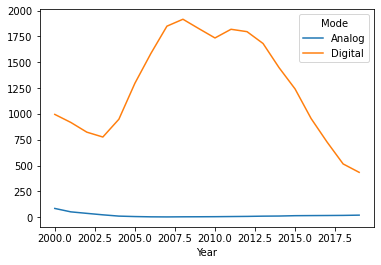

In [17]:
mode_by_year.unstack().plot()